# Videogame Recommendation System on Steam Data

-- DISCLAIMER, data is from https://www.kaggle.com/datasets/tamber/steam-video-games/data, I don't work at Steam. Lol

## First things first, reading in the dataset and performing EDAs

In [1]:
# Importing pands to read in the dataset and analyze it
import pandas as pd

# Steam Videogames
SteamVGs = pd.read_csv('data\steam-200k.csv')

## Now looking at the dataset with exactly 200k rows, we can see the following columns -
- User ID
- Game Name
- Purchase/Play 
- 1.0 if behavior is purchase, number of hours played if behavior is play
- A random column filled with 200k 0s

In [2]:
SteamVGs

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
199994,128470551,Titan Souls,play,1.5,0
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1.0,0


In [3]:
SteamVGs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   151603712                   199999 non-null  int64  
 1   The Elder Scrolls V Skyrim  199999 non-null  object 
 2   purchase                    199999 non-null  object 
 3   1.0                         199999 non-null  float64
 4   0                           199999 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


## This dataset is really, really clean, but it definitely has some problems with it. The first things I want to clean up before I work on this dataset is to -
- Give dataset proper column titles
- Drop that column with 200k 0s

In [4]:
# Since the dataset has no titls, creating a list of titles
columns = ['User_ID', 'Videogame', 'Behavior', 'Hours_Played', 'Drop_this']

# Reading the data in, but removing the assumed title, and assigning names to the list
SteamVGs = pd.read_csv('data\steam-200k.csv', header=None, names=columns)

# Dropping that last useless column
SteamVGs.drop("Drop_this", axis=1, inplace=True)

SteamVGs

,User_ID,Videogame,Behavior,Hours_Played
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
...,...,...,...,...
199995,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,purchase,1.0
199997,128470551,Grand Theft Auto Vice City,play,1.5
199998,128470551,RUSH,purchase,1.0


## Visualizing the data to try and understand the data a little bit more. Ideas:
- Unique users count, users that appear the most, users that appear the least
- Users by play time, top 25, and bottom 25
- Videogames, sorted by count, top 25 vg counts, bottom vg counts
- Videogames by play time, top 25 vgs by play time, bottom vgs play times
- How many people did not by the game they played

### User counts visuals section:

In [5]:
# Importing relevant packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Printing the number of unique users
print("There are", len(SteamVGs['User_ID'].unique()), "users in the dataset.")

There are 12393 users in the dataset.


User_ID
62990992     1573
33865373      949
11403772      906
30246419      901
47457723      855
58345543      833
22301321      775
49893565      774
138941587     747
64787956      723
33013552      720
53875128      702
20772968      699
24469287      699
76892907      695
36546868      665
11373749      662
48798067      653
86469479      648
116876958     604
975449        580
36557643      547
122026623     546
24721232      545
38049880      526
Name: count, dtype: int64


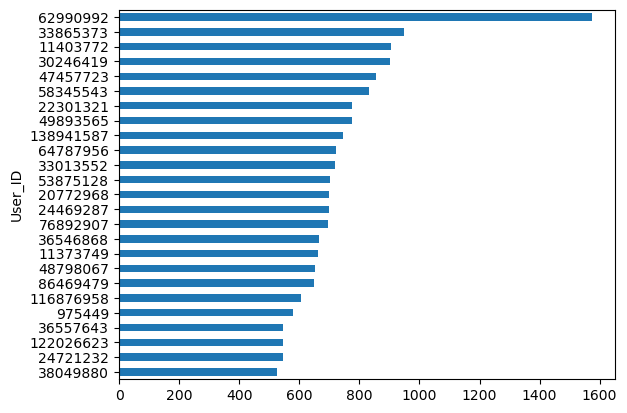

In [7]:
# Top 25 users that appear the most
SteamVGs['User_ID'].value_counts(ascending=True).sort_values().tail(25).plot(kind='barh')
print(SteamVGs['User_ID'].value_counts().head(25))

User_ID
62990992     1075
33865373      783
30246419      766
58345543      667
76892907      597
20772968      595
11403772      592
64787956      591
22301321      568
47457723      557
33013552      520
53875128      505
86469479      480
49893565      477
11373749      458
24721232      456
138941587     448
36546868      430
59825286      428
122026623     419
36557643      416
24469287      415
154230723     413
48798067      399
116876958     396
Name: count, dtype: int64


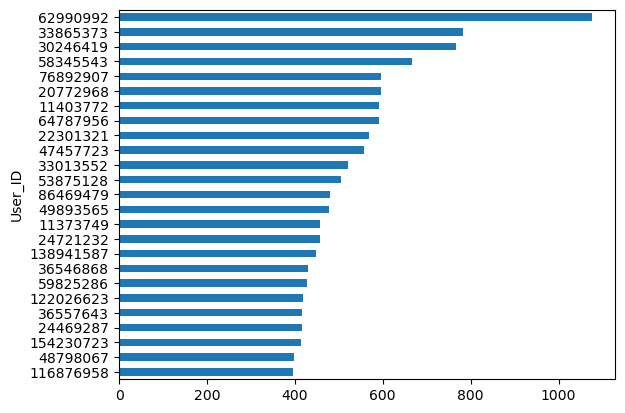

In [8]:
# Top 25 users that bought the most games
SteamVGs[SteamVGs["Behavior"]=="purchase"]["User_ID"].value_counts(ascending=True).sort_values().tail(25).plot(kind="barh")
print(SteamVGs[SteamVGs["Behavior"]=="purchase"]["User_ID"].value_counts().head(25))

In [9]:
# Users that appear the least
print("There are", len(SteamVGs['User_ID'].drop_duplicates(keep=False)), "users that only appear once in the dataset.")

There are 572 users that only appear once in the dataset.


### User counts by play time section:

User_ID
73017395     11754.0
10599862     11651.7
100630947    10853.2
26762388     10470.1
153382649     9640.0
43684632      9546.3
48798067      9427.2
52731290      9417.6
42935819      8172.9
14544587      8137.1
52567955      7836.7
130882834     7801.9
57433226      7741.5
63615483      7190.4
47063596      7161.0
67694595      7152.1
17017968      7108.5
50818751      6929.9
49893565      6891.9
24721232      6887.0
99077905      6838.4
121199670     6827.2
42849279      6766.2
81054122      6470.0
32126281      6362.6
Name: Hours_Played, dtype: float64


<Axes: ylabel='User_ID'>

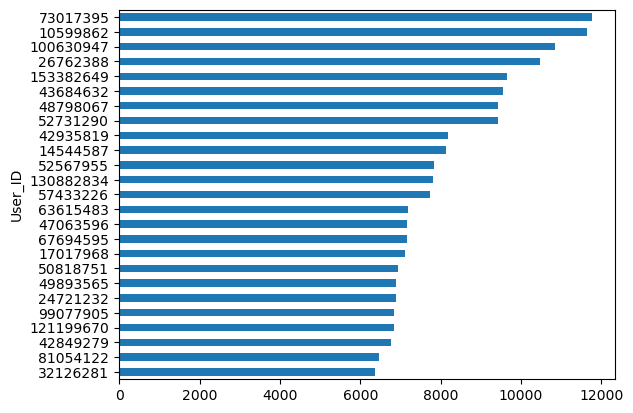

In [10]:
# Top 25 Users by playtime

print(SteamVGs[SteamVGs["Behavior"]=="play"].groupby("User_ID")["Hours_Played"].sum().sort_values(ascending=False).head(25))

SteamVGs[SteamVGs['Behavior']=='play'].groupby("User_ID")["Hours_Played"].sum().sort_values().tail(25).plot(kind='barh')

In [11]:
# Bottom 25
SteamVGs[SteamVGs['Behavior']=='play'].groupby("User_ID")["Hours_Played"].sum().sort_values(ascending=False).tail(25)

User_ID
113661299    0.1
247050395    0.1
131533123    0.1
78874120     0.1
78996406     0.1
200083632    0.1
270165540    0.1
239606395    0.1
115122875    0.1
45016429     0.1
188803925    0.1
129585692    0.1
305993961    0.1
283636252    0.1
174813416    0.1
129910954    0.1
74557142     0.1
284604128    0.1
74859759     0.1
154691996    0.1
130950166    0.1
144307381    0.1
29750135     0.1
285316500    0.1
239544929    0.1
Name: Hours_Played, dtype: float64

In [12]:
print("There are", len(SteamVGs[SteamVGs["Hours_Played"]==0.1]), "instanes of people playing a game 6 minutes or less")

There are 1787 instanes of people playing a game 6 minutes or less


### All videogames


In [35]:
# Count of videogames
len(SteamVGs.groupby("Videogame"))

5155

In [13]:
# Making a list of every single videogame to see some of the competition
videogames = list(SteamVGs["Videogame"].unique())

videogames

['The Elder Scrolls V Skyrim',
 'Fallout 4',
 'Spore',
 'Fallout New Vegas',
 'Left 4 Dead 2',
 'HuniePop',
 'Path of Exile',
 'Poly Bridge',
 'Left 4 Dead',
 'Team Fortress 2',
 'Tomb Raider',
 'The Banner Saga',
 'Dead Island Epidemic',
 'BioShock Infinite',
 'Dragon Age Origins - Ultimate Edition',
 'Fallout 3 - Game of the Year Edition',
 'SEGA Genesis & Mega Drive Classics',
 'Grand Theft Auto IV',
 'Realm of the Mad God',
 'Marvel Heroes 2015',
 'Eldevin',
 'Dota 2',
 'BioShock',
 'Robocraft',
 "Garry's Mod",
 'Jazzpunk',
 'Alan Wake',
 'BioShock 2',
 'Fallen Earth',
 "Fallout New Vegas Courier's Stash",
 'Fallout New Vegas Dead Money',
 'Fallout New Vegas Honest Hearts',
 'Grand Theft Auto Episodes from Liberty City',
 'Hitman Absolution',
 'HuniePop Official Digital Art Collection',
 'HuniePop Original Soundtrack',
 'The Banner Saga - Mod Content',
 'The Elder Scrolls V Skyrim - Dawnguard',
 'The Elder Scrolls V Skyrim - Dragonborn',
 'The Elder Scrolls V Skyrim - Hearthfire',


### Videogame counts section:

Videogame
Dota 2                                          9682
Team Fortress 2                                 4646
Counter-Strike Global Offensive                 2789
Unturned                                        2632
Left 4 Dead 2                                   1752
Counter-Strike Source                           1693
Counter-Strike                                  1424
Garry's Mod                                     1397
The Elder Scrolls V Skyrim                      1394
Warframe                                        1271
Half-Life 2 Lost Coast                          1158
Sid Meier's Civilization V                      1150
Robocraft                                       1096
Half-Life 2 Deathmatch                          1021
Portal                                          1005
Portal 2                                         997
Half-Life 2                                      995
Heroes & Generals                                993
Terraria                            

<Axes: ylabel='Videogame'>

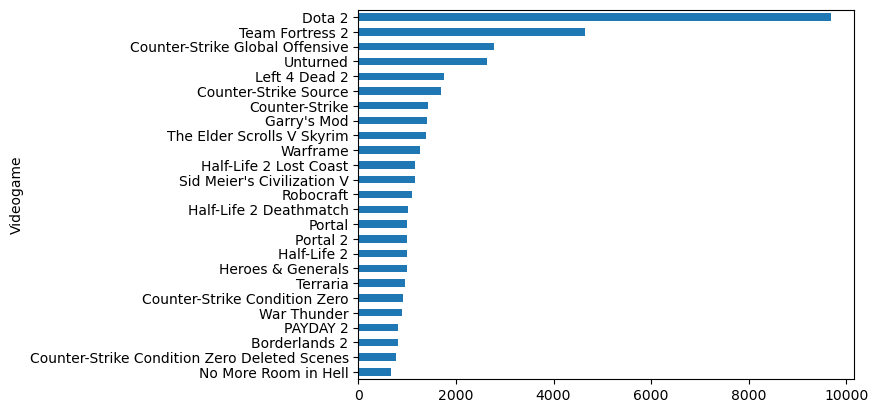

In [15]:
# Top 25 most popular videogames

print(SteamVGs["Videogame"].value_counts().head(25))

SteamVGs["Videogame"].value_counts().head(25).sort_values().plot(kind="barh")

In [16]:
# How many videogames appear only once
print("There are", len(SteamVGs["Videogame"].drop_duplicates(keep=False)), "games that appear once.")

There are 665 games that appear once.


### Videogame by play time section:

Videogame
Dota 2                                         981684.6
Counter-Strike Global Offensive                322771.6
Team Fortress 2                                173673.3
Counter-Strike                                 134261.1
Sid Meier's Civilization V                      99821.3
Counter-Strike Source                           96075.5
The Elder Scrolls V Skyrim                      70889.3
Garry's Mod                                     49725.3
Call of Duty Modern Warfare 2 - Multiplayer     42009.9
Left 4 Dead 2                                   33596.7
Football Manager 2013                           32308.6
Football Manager 2012                           30845.8
Football Manager 2014                           30574.8
Terraria                                        29951.8
Warframe                                        27074.6
Football Manager 2015                           24283.1
Arma 3                                          24055.7
Grand Theft Auto V                    

<Axes: ylabel='Videogame'>

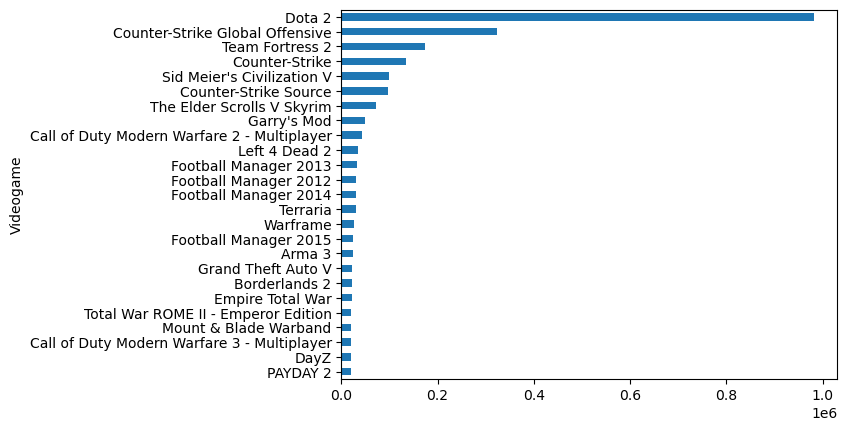

In [17]:
# Top 25 most played videogames

print(SteamVGs[SteamVGs['Behavior']=='play'].groupby("Videogame")["Hours_Played"].sum().sort_values(ascending=False).head(25))

SteamVGs[SteamVGs['Behavior']=='play'].groupby("Videogame")["Hours_Played"].sum().sort_values().tail(25).plot(kind="barh")

In [18]:
# Least 25 most plays videogames
print("There are",
      len(SteamVGs[SteamVGs['Behavior']=='play'].groupby("Videogame")["Hours_Played"].sum().sort_values().head(56)),
      "games that are played for 6 minutes or less.")

There are 56 games that are played for 6 minutes or less.


### Just checking to see if there are any users that have purchase as 0

In [19]:
# Checking how many purchases there were across all users
print("There are", len(SteamVGs.loc[(SteamVGs['Behavior']=="purchase") & (SteamVGs["Hours_Played"] == 1)]),
     "videogame purchases across all users.")

SteamVGs.loc[(SteamVGs['Behavior']=="purchase") & (SteamVGs["Hours_Played"] == 1)]

There are 129511 videogame purchases across all users.


,User_ID,Videogame,Behavior,Hours_Played
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
2,151603712,Fallout 4,purchase,1.0
4,151603712,Spore,purchase,1.0
6,151603712,Fallout New Vegas,purchase,1.0
8,151603712,Left 4 Dead 2,purchase,1.0
...,...,...,...,...
199990,128470551,Fallen Earth,purchase,1.0
199992,128470551,Magic Duels,purchase,1.0
199994,128470551,Titan Souls,purchase,1.0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0


In [20]:
# Checking if any users haven't purchased their game
print("There are", len(SteamVGs.loc[(SteamVGs['Behavior']=="purchase") & (SteamVGs["Hours_Played"] == 0)]),
     "people who haven't bought the game they've played.")

SteamVGs.loc[(SteamVGs['Behavior']=="purchase") & (SteamVGs["Hours_Played"] == 0)]

There are 0 people who haven't bought the game they've played.


,User_ID,Videogame,Behavior,Hours_Played


In [21]:
# Here, I accidentally found that there are some people who bought games and NEVER played them. 
# Now, I am trying to find just how many instance there are of this. 
# So these are technically the REAL bottom 25. 

# As you can see by this tail, there are some users who just have a "purchase" and no play.
SteamVGs.groupby("User_ID")["Hours_Played"].sum().sort_values(ascending=False).tail(10)

User_ID
294750703    1.0
61098124     1.0
61068356     1.0
61044093     1.0
239021889    1.0
238666183    1.0
237789130    1.0
59025651     1.0
156877824    1.0
54704882     1.0
Name: Hours_Played, dtype: float64

In [33]:
# Instances of people purchasing games
purchases_count = len(SteamVGs[SteamVGs['Behavior']=='purchase'])
print("Purchase count: ", purchases_count)

# Instances of people playing games
play_count = len(SteamVGs[SteamVGs['Behavior']=='play'])
print("Play count: ", play_count)

# Instances of people buying a game and not playing them
print("There are", purchases_count - play_count, "instances of people purchasing a game and never playing them.")

Purchase count:  129511
Play count:  70489
There are 59022 instances of people purchasing a game and never playing them.


### Recommendation Systems I can make off of this data:
- Popularity-based recommendations
- Playtime-based recommendations
- User-based collaborative filtering using play time

### Limitations to think about for future recommendation systems
- In the playtime area, it would be great to have data on the playtime in the first 14 days of the purchase and playtime in the last 14 days in real-time
- Improved u-b collab filtering by categorizing games by the length of the game. (short games, long games, and replayable/open-ended games)
- Maybe also categorize games by developer status like Triple A, Indie, and everything in between to improve performance

In [23]:
# Firstly, do I drop every row where the Behavior column is purchase?
# Or at least filter for just the play role in each section?

# Oh NO, I SHOULD use purchase so it doesn't recommend games a user has already bought, but
# use the playtime for similarities

In [24]:
# Creating a new datarframe that only holds rows with play time values for better recommendations
Playtimes = SteamVGs[SteamVGs["Behavior"]=="play"].pivot_table(index="Videogame", columns="User_ID", values="Hours_Played")

# Filling in the games that have NaN as playtimes because the user has no data on play time for that game yet
Playtimes = Playtimes.fillna(0)

In [25]:
# The dataset is now formatted to be each videogame play time per user
Playtimes

User_ID,5250,76767,86540,144736,181212,229911,298950,381543,547685,554278,...,309228590,309255941,309262440,309265377,309404240,309434439,309554670,309626088,309824202,309903146
Videogame,,,,,,,,,,,,,,,,,,,,,
007 Legends,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0RBITALIS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Second Ninja,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"10,000,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rymdkapsel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sZone-Online,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the static speaks my name,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from scipy.sparse import csr_matrix

# Creating matrix using the values in the dataset
pt_matrix = csr_matrix(Playtimes.values)
pt_matrix.shape

(3600, 11350)

In [27]:
# Importing a random select feature to pick one of the users in the matrix at random
import numpy as np

# Random value chosen from 1 to the x amount of users
user_index = np.random.choice(pt_matrix.shape[0])

In [28]:
# Importing a distance metric to find the most similar points using cosine similarity
from sklearn.metrics.pairwise import linear_kernel

cosine = linear_kernel(pt_matrix)

In [29]:
# Function to compute the similarity in the data by looking at what they and other users have played
# Creates an empty list to be used to find the 10 most similar games, and returns that list back
def recommendations(name, cosine = cosine):
    videogame_list = []
    
    score = pd.Series(cosine[user_index]).sort_values(ascending=False)
    
    top_10 = list(score.iloc[0:11].index)
    
    for each in top_10:
        videogame_list.append(list(Playtimes.index)[each])
        
    return videogame_list

In [30]:
# Shows the index of the 10 recommended games from the list as the titles of the 10 recommended games
recommendations(Playtimes.index[user_index])

['ARK Survival Evolved',
 'Unturned',
 'Banished',
 'Warframe',
 'Cities Skylines',
 'Stranded Deep',
 'Euro Truck Simulator 2',
 'Echo of Soul',
 "Sid Meier's Civilization V",
 'The Mighty Quest For Epic Loot',
 'Tropico 4']

In [31]:
# This is the original data on games the random user has played
SteamVGs[SteamVGs["User_ID"]==Playtimes.columns[user_index]]
# Program never recommends the same game as you can see

,User_ID,Videogame,Behavior,Hours_Played
49364,101597552,Team Fortress 2,purchase,1.0
49365,101597552,Team Fortress 2,play,34.0
49366,101597552,Unturned,purchase,1.0


### Measures of Error

In [54]:
# GAH LEE, I DEFINITELY DIDN'T DO THIS RIGHT. COME BACK LATER!!!
np.sum(pt_matrix)**2

3294528898508.478